[[2. 2. 0. 2. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 2. 1. 2.
  2. 2. 2. 2. 2. 2.]]
[[0.6515     0.16325   ]
 [0.36136364 0.21709091]
 [0.61118182 0.41336364]]


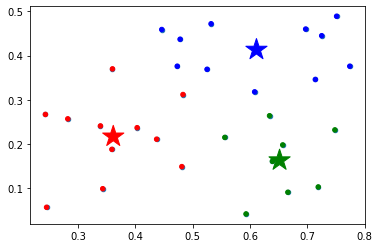

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.io
 
def loaddata():
    data = np.loadtxt('watermelon_4.txt',delimiter=',')
    return data
 
X = loaddata()
plt.scatter(X[:, 0], X[:, 1], s=20)
#随机初始化中心点
def kMeansInitCentroids(X, k):
    #从X的数据中随机取k个作为中心点
    # 补充随机初始化中心点的代码
    m,n=X.shape
    centroids=np.zeros((k,n))
    idx=np.random.randint(0,m,k)
    for i in range(k):
        centroids[i,:]=X[idx[i],:]
    return centroids
 
#计算数据点到中心点的距离，并判断该数据点属于哪个中心点
def findClosestCentroids(X, centroids):
    #idx中数据表明对应X的数据是属于哪一个中心点的
    idx = np.zeros(len(X)).reshape( X.shape[0],-1)
    for i in range(len(X)):
        #补充计算数据点到中心点的距离，并判断该数据点所属中心点的代码
        min_dist=1000000
        for j in range (centroids.shape[0]):
            dist=np.sum((X[i,:]-centroids[j,:])**2)
            if(dist<min_dist):
                min_dist = dist
                idx[i]=j
    return idx
 
#重新计算中心点位置
def computeCentroids(X, idx):
    k = set(np.ravel(idx).tolist()) #找到所有聚类中心索引
    k = list(k)
    centroids = np.ndarray((len(k),X.shape[1]))
    for i in range(len(k)):
        #选择数据X中类别为k[i]的数据
        data = X[np.where(idx==k[i])[0]]
        #重新计算聚类中心
        centroids[i] = np.sum(data,axis=0)/len(data)
    return centroids
 
def k_means(X, k, max_iters):
    initial_centroids = kMeansInitCentroids(X,k)
    #补充k均值代码
    idx=np.zeros(X.shape)
    centroids=initial_centroids
    for i in range(max_iters):
        idx = findClosestCentroids(X,centroids)
        centroids=computeCentroids(X,idx)
    return idx,centroids
 
idx,centroids = k_means(X, 3, 8)
idx=idx.reshape(1,-1)
print(idx)
print(centroids)
 
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.scatter(X[:, 0], X[:, 1], c=np.ravel(idx), cmap=cm_dark, s=20)
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.arange(len(centroids)), cmap=cm_dark, marker='*', s=500)
plt.show()